# KNN(K-Nearest Neighbors)

## 정의 : 가장 근접한 이웃의 값을 평균해서 예측하거나 빈도가 많은 클래스로 분류하는 탐색적 기법

### 활용 용도
- 위치 측위 : 이동객체의 신호강도를 측정하고 이를 KNN 알고리즘을 활용하여 위치를 추정
- 선호도 분류 : 사용자의 추천정보 기반 성향/구매패턴 분류
- 데이터 필터링 : 포털 등의 중복, 유사 게시글 필터링
- 교통량, 통행시간 예측
###
최근접 이웃 : 새로운 데이터가 주어졌을 때 가장 가까운 K-이웃을 찾고 그 이웃의 값을 평균하거나 다수 클래스로 분류하여 새로운 데이터 값으로 결정

결정경계 : 일정한 간격으로 생성한 데이터의 예측값을 이용해 결정 경계 구분

모델의 복잡도 : KNN의 K(이웃 수) 조정이 중요하다. 
- n_neighbors 가 작으면 과대적합 위험이 증가 
- n_neighbors 가 크면 과소적합 위험이 증가



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df_raw = pd.read_csv('./실습화일/2. Big Data 분석/HMEQ.csv')
df_raw['JOB'].fillna('Other',inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

#설명,목표 변수 데이터 구분
df_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_y = df_raw_dummy["BAD"]
#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18) Test (1125, 18)


In [5]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)
# KNN 모델 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.916
Accuracy on test set: 0.908


In [6]:
# 이웃 수 증가에 따른 정확도 변화
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)  # random_state 가 없음
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


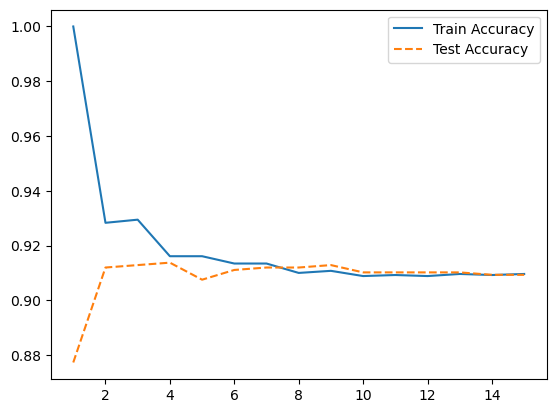

In [7]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--',label='Test Accuracy')
plt.legend()

In [10]:
# 가중치 별 이웃 수 증가에 따른 정확도 변화
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_n_neighbors = [i for i in range(1,11)] *2
para_weights=(['uniform'])*10 + (['distance']*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)  # random_state 가 없음
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [11]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index='Neighbors',columns='Weights',values=['TrainAccuracy','TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.877333  0.877333
2                   1.0  0.928326     0.877333  0.912000
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556
6                   1.0  0.913458     0.912889  0.911111
7                   1.0  0.913458     0.912889  0.912000
8                   1.0  0.910027     0.913778  0.912000
9                   1.0  0.910789     0.914667  0.912889
10                  1.0  0.908883     0.914667  0.910222

<Axes: xlabel='Neighbors'>

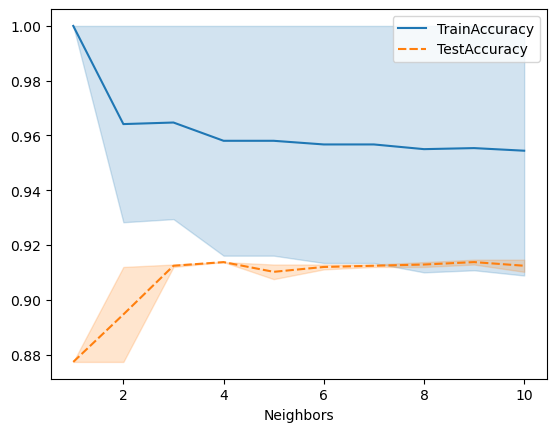

In [12]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [13]:
# 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_n_neighbors = [i for i in range(1,11)] *2
para_metric=(['euclidean'])*10 + (['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights='uniform',metric=v_metric)  # random_state 가 없음
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
#데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.877
1,2,euclidean,0.928,0.912
2,3,euclidean,0.929,0.913
3,4,euclidean,0.916,0.914
4,5,euclidean,0.916,0.908
5,6,euclidean,0.913,0.911
6,7,euclidean,0.913,0.912
7,8,euclidean,0.910,0.912
8,9,euclidean,0.911,0.913
9,10,euclidean,0.909,0.910


<Axes: xlabel='Neighbors'>

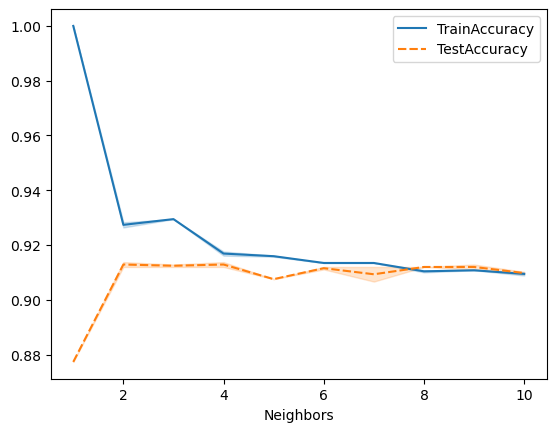

In [14]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index='Neighbors',columns='Metric',values=['TrainAccuracy','TestAccuracy'])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0 + '_' +level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='euclidean')
knn_model.fit(df_train_x,df_train_y)
y_pred = knn_model.predict(df_test_x)
print('Accuracy on training set : {:.3f}'.format(knn_model.score(df_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_model.score(df_test_x,df_test_y)))
print('Confusion matrix :\n'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set : 0.916
Accuracy on test set : 0.914
Confusion matrix :

              precision    recall  f1-score   support

           0      0.915     0.997     0.955      1021
           1      0.769     0.096     0.171       104

    accuracy                          0.914      1125
   macro avg      0.842     0.547     0.563      1125
weighted avg      0.902     0.914     0.882      1125



In [17]:
estimator = KNeighborsClassifier()
param_grid = {
    'n_neighbors' : para_n_neighbors,
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_knn.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_knn.best_estimator_))
print("\nbest parameter:\n{}".format(grid_knn.best_params_))
print("\nbest score:\n{}".format(grid_knn.best_score_.round(3)))

best estimator model:
KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

best parameter:
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

best score:
0.91
